In [2]:
import datasets
train_dataset = datasets.load_dataset(

        "mozilla-foundation/common_voice_17_0",  
        "fi",
        split='train',
        cache_dir='data/hf',
        token=True,
        trust_remote_code=True
)

In [3]:
samples = train_dataset.select([0,1,2,3])
print(f'{samples[0]['sentence']}')


Tuonne pakenivat kauemmas nuo väijyävät henget.


In [4]:
sample = samples[0]

In [5]:
import torch
import torchaudio
waveform = torch.tensor(sample['audio']['array']).float()
print(waveform.shape)

torch.Size([224640])


In [6]:
print(f'og sample rate {sample['audio']['sampling_rate']}')
sample_rate = sample['audio']['sampling_rate']
if sample_rate != 16000:
    resampler = torchaudio.transforms.Resample(sample_rate, 16000)
    waveform = resampler(waveform)

og sample rate 48000


In [7]:
mel_spectrogram_converter = torchaudio.transforms.MelSpectrogram(
        sample_rate=16000,
        n_fft=400,
        n_mels=40
)
waveform = torchaudio.functional.preemphasis(waveform)
mel_spectrogram = mel_spectrogram_converter(waveform)
print(f'shape{mel_spectrogram.shape}')

shapetorch.Size([40, 375])


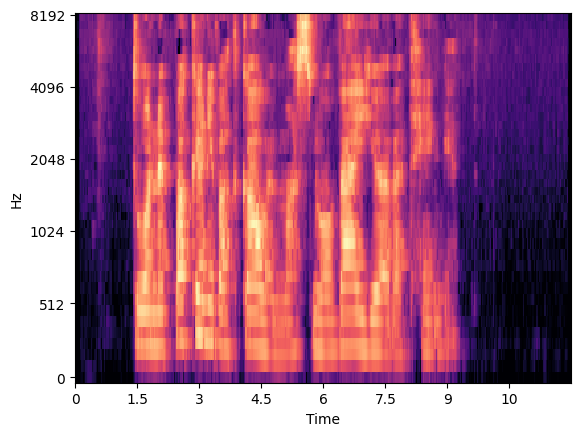

In [21]:
from librosa.display import specshow
import librosa
import numpy as np
mel_spec_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
specshow(mel_spec_db, sr=16000, x_axis='time', y_axis='mel')
